# Data Understanding and Importing Libraries

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
import warnings
warnings.filterwarnings('ignore')

In [221]:
# Reading the housing data
housing=pd.read_excel(r'C:\Users\Dell\Desktop\DS-assignment\DS - Assignment Part 1 data set.xlsx')
housing.head()

Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2012.916667       32.0                                  84.87882   
1       2012.916667       19.5                                 306.59470   
2       2013.583333       13.3                                 561.98450   
3       2013.500000       13.3                                 561.98450   
4       2012.833333        5.0                                 390.56840   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House size (sqft)  House price of unit area  
0                575                      37.9  
1               1240                      42.2  
2               1060                      47.3  
3                875                      54.8  
4                491                      43.1

In [222]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


-- Transaction date is in incorrect format we need to change that

In [223]:
# we will extract only year from it 
housing['Transaction date'] = pd.to_datetime(housing['Transaction date'], format='%y%m%d') 

In [224]:
housing.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

1. No need for data cleaning as there is no null values in the housing dataset

In [225]:
housing1=housing

In [226]:
housing1.drop(['longitude','latitude','Transaction date'],axis=1,inplace=True)

In [227]:
housing1.head()

House Age  Distance from nearest Metro station (km)  \
0       32.0                                  84.87882   
1       19.5                                 306.59470   
2       13.3                                 561.98450   
3       13.3                                 561.98450   
4        5.0                                 390.56840   

   Number of convenience stores  Number of bedrooms  House size (sqft)  \
0                            10                   1                575   
1                             9                   2               1240   
2                             5                   3               1060   
3                             5                   2                875   
4                             5                   1                491   

   House price of unit area  
0                      37.9  
1                      42.2  
2                      47.3  
3                      54.8  
4                      43.1

2. Making a Total House price column 

In [228]:
housing1['House Price']=round(housing1['House size (sqft)']*housing1['House price of unit area'],0)

In [229]:
housing1.head()

House Age  Distance from nearest Metro station (km)  \
0       32.0                                  84.87882   
1       19.5                                 306.59470   
2       13.3                                 561.98450   
3       13.3                                 561.98450   
4        5.0                                 390.56840   

   Number of convenience stores  Number of bedrooms  House size (sqft)  \
0                            10                   1                575   
1                             9                   2               1240   
2                             5                   3               1060   
3                             5                   2                875   
4                             5                   1                491   

   House price of unit area  House Price  
0                      37.9      21792.0  
1                      42.2      52328.0  
2                      47.3      50138.0  
3                      54.8      47950.0  
4                      43.1      21162.0

In [230]:
housing1.shape

(414, 7)

# Univariate and Bivariate Analysis

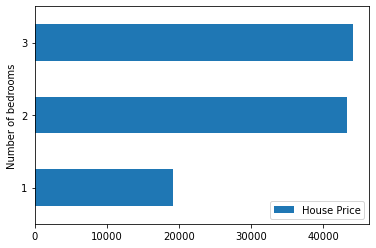

In [231]:
housing1.groupby(['Number of bedrooms'])['House Price'].median().plot.barh()
plt.legend()
plt.show()

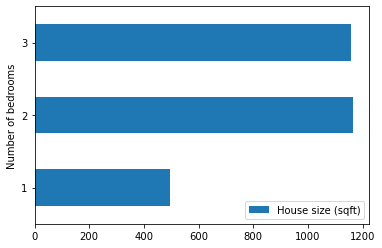

In [232]:
housing1.groupby(['Number of bedrooms'])['House size (sqft)'].median().plot.barh()
plt.legend()
plt.show()

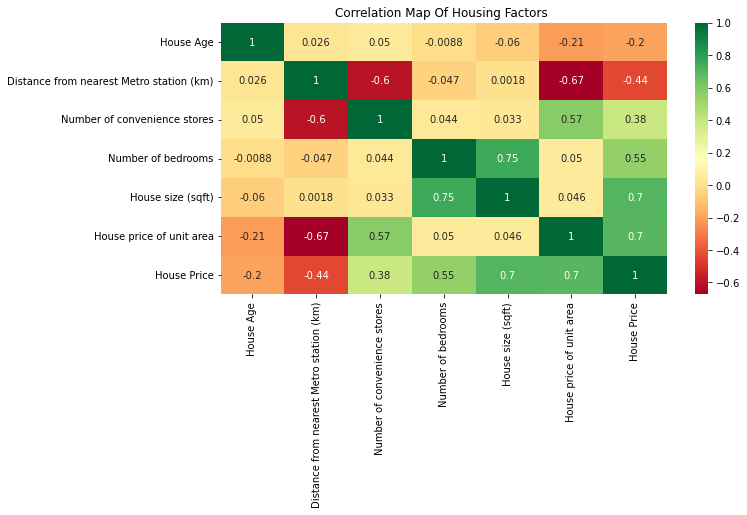

In [233]:
plt.figure(figsize=[10,5])
sns.heatmap(data=housing1.corr(),annot=True,cmap='RdYlGn')
plt.title('Correlation Map Of Housing Factors ')
plt.show()

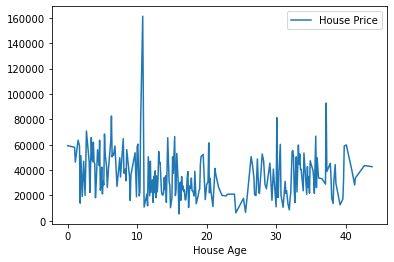

In [234]:
housing1.groupby(['House Age'])['House Price'].median().plot()
plt.legend()
plt.show()

In [235]:
housing1.head()

House Age  Distance from nearest Metro station (km)  \
0       32.0                                  84.87882   
1       19.5                                 306.59470   
2       13.3                                 561.98450   
3       13.3                                 561.98450   
4        5.0                                 390.56840   

   Number of convenience stores  Number of bedrooms  House size (sqft)  \
0                            10                   1                575   
1                             9                   2               1240   
2                             5                   3               1060   
3                             5                   2                875   
4                             5                   1                491   

   House price of unit area  House Price  
0                      37.9      21792.0  
1                      42.2      52328.0  
2                      47.3      50138.0  
3                      54.8      47950.0  
4                      43.1      21162.0

In [236]:
housing1['Number of convenience stores'].value_counts()

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Number of convenience stores, dtype: int64

# Splitting the Data into Train and Test DataSet

In [237]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(housing1,train_size=0.7,test_size=0.3,random_state=100)

In [238]:
print(df_train.shape)
print(df_test.shape)

(289, 7)
(125, 7)


### Rescaling the features

In [239]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [240]:
housing1.head()

House Age  Distance from nearest Metro station (km)  \
0       32.0                                  84.87882   
1       19.5                                 306.59470   
2       13.3                                 561.98450   
3       13.3                                 561.98450   
4        5.0                                 390.56840   

   Number of convenience stores  Number of bedrooms  House size (sqft)  \
0                            10                   1                575   
1                             9                   2               1240   
2                             5                   3               1060   
3                             5                   2                875   
4                             5                   1                491   

   House price of unit area  House Price  
0                      37.9      21792.0  
1                      42.2      52328.0  
2                      47.3      50138.0  
3                      54.8      47950.0  
4                      43.1      21162.0

In [241]:
numerical_vars=['House Age','Distance from nearest Metro station (km)','Number of convenience stores','Number of bedrooms','House size (sqft)','House price of unit area','House Price']

df_train[numerical_vars]=scaler.fit_transform(df_train[numerical_vars])

df_train.head()

House Age  Distance from nearest Metro station (km)  \
287   0.438356                                  0.067710   
31    0.675799                                  0.115400   
209   0.794521                                  0.023551   
239   0.413242                                  0.125968   
47    0.819635                                  0.095497   

     Number of convenience stores  Number of bedrooms  House size (sqft)  \
287                           0.5                 0.5           0.971767   
31                            0.7                 0.5           0.979964   
209                           0.8                 1.0           0.862477   
239                           0.0                 1.0           0.612022   
47                            0.3                 1.0           0.423497   

     House price of unit area  House Price  
287                  0.230209     0.275133  
31                   0.158326     0.202132  
209                  0.303003     0.319037  
239                  0.201092     0.169724  
47                   0.490446     0.307144

### Dividing X and y sets for model building

In [242]:
y_train=df_train.pop('House Price')
X_train=df_train

# Model Building  

### Model Building Using RFE ( Recursive Feature Elimination )

In [243]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [244]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [245]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('House Age', True, 1),
 ('Distance from nearest Metro station (km)', True, 1),
 ('Number of convenience stores', True, 1),
 ('Number of bedrooms', True, 1),
 ('House size (sqft)', True, 1),
 ('House price of unit area', True, 1)]

In [246]:
col = X_train.columns[rfe.support_]
col

Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'Number of bedrooms',
       'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [247]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

# Building model using Statsmodel for detailed statistics

### Model 1

In [248]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [249]:
X_train_rfe = X_train[col]

In [250]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [251]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     693.6
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          1.26e-165
Time:                        14:12:39   Log-Likelihood:                 579.47
No. Observations:                 289   AIC:                            -1145.
Df Residuals:                     282   BIC:                            -1119.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [252]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                     const  24.46
5                         House size (sqft)   2.38
4                        Number of bedrooms   2.37
2  Distance from nearest Metro station (km)   2.09
6                  House price of unit area   2.07
3              Number of convenience stores   1.71
1                                 House Age   1.12

-- After checking the p value and VIFs 'House Age' is insignificant to other characteristics for house price

In [253]:
X_train_rfe=X_train_rfe.drop(['House Age'],axis=1)

### Model 2

In [254]:
X_train_lm = sm.add_constant(X_train_rfe)

In [255]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     834.8
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          4.54e-167
Time:                        14:12:40   Log-Likelihood:                 579.38
No. Observations:                 289   AIC:                            -1147.
Df Residuals:                     283   BIC:                            -1125.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [256]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                     const  18.35
3                        Number of bedrooms   2.37
4                         House size (sqft)   2.37
1  Distance from nearest Metro station (km)   2.08
5                  House price of unit area   1.89
2              Number of convenience stores   1.65

-- p value & vif is higher of 'Number of bedrooms' 

In [257]:
X_train_rfe=X_train_rfe.drop(['Number of bedrooms'],axis=1)

### Model 3

In [258]:
X_train_lm = sm.add_constant(X_train_rfe)

In [259]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1046.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          1.51e-168
Time:                        14:12:40   Log-Likelihood:                 579.24
No. Observations:                 289   AIC:                            -1148.
Df Residuals:                     284   BIC:                            -1130.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [260]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                     const  18.33
1  Distance from nearest Metro station (km)   2.07
4                  House price of unit area   1.89
2              Number of convenience stores   1.65
3                         House size (sqft)   1.00

In [261]:
X_train_rfe=X_train_rfe.drop(['Distance from nearest Metro station (km)'],axis=1)

### Model 4 

In [262]:
X_train_lm = sm.add_constant(X_train_rfe)

In [263]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1398.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          4.19e-170
Time:                        14:13:23   Log-Likelihood:                 579.12
No. Observations:                 289   AIC:                            -1150.
Df Residuals:                     285   BIC:                            -1136.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

-- Model 4 is the final model as the vif's and the p-values are quite low for their respected variable for price prediction

# Residual Analysis of the Train Data

In [265]:
y_train_price = lm.predict(X_train_lm)

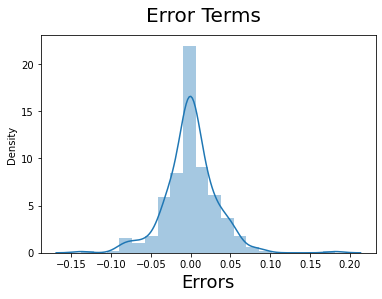

In [267]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Making Predictions

In [268]:
numerical_vars=['House Age','Distance from nearest Metro station (km)','Number of convenience stores','Number of bedrooms','House size (sqft)','House price of unit area','House Price']

df_test[numerical_vars]=scaler.fit_transform(df_test[numerical_vars])

df_test.head()

House Age  Distance from nearest Metro station (km)  \
121   0.328502                                  0.074624   
353   0.099034                                  0.338066   
96    0.154589                                  0.010676   
43    0.830918                                  0.077896   
125   0.026570                                  0.027090   

     Number of convenience stores  Number of bedrooms  House size (sqft)  \
121                           0.5                 0.0           0.033945   
353                           0.3                 0.5           0.454128   
96                            0.9                 1.0           0.689908   
43                            0.6                 0.0           0.037615   
125                           0.6                 0.5           0.500917   

     House price of unit area  House Price  
121                  0.578947     0.146287  
353                  0.304276     0.215707  
96                   0.768092     0.623005  
43                   0.350329     0.086033  
125                  0.588816     0.396499

In [270]:
y_test = df_test.pop('House Price')
X_test = df_test

In [272]:
X_test_rfe = X_test[X_train_rfe.columns[1:]] 
X_test_rfe = sm.add_constant(X_test_rfe)

In [273]:
y_pred = lm.predict(X_test_rfe)

# Model Evaluation

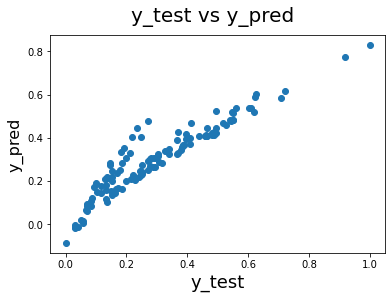

In [274]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [277]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

88.15576131192111

In [278]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>